In [1]:
import pandas as pd                     # đọc, xử lý dữ liệu dạng bảng
import numpy as np                      # xử lý số học cơ bản
from sklearn.model_selection import train_test_split  # chia dữ liệu train/test
from sklearn.neighbors import KNeighborsClassifier    # mô hình KNN

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


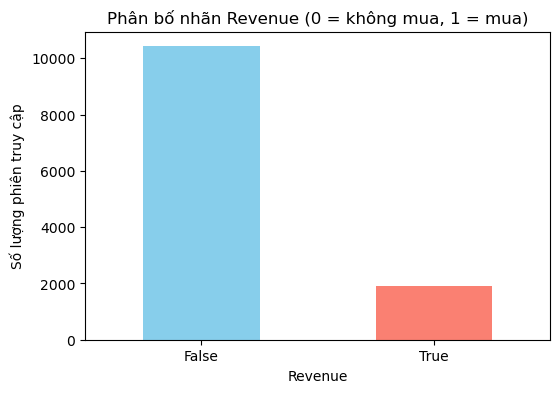

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
df['Revenue'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Phân bố nhãn Revenue (0 = không mua, 1 = mua)")
plt.xlabel("Revenue")
plt.ylabel("Số lượng phiên truy cập")
plt.xticks(rotation=0)
plt.show()


In [4]:
df["Weekend"] = df["Weekend"].astype(int)
df["Revenue"] = df["Revenue"].astype(int)

In [5]:
df = pd.get_dummies(df, columns=["Month", "VisitorType"])

In [6]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4, stratify=y
)

print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)

Kích thước tập huấn luyện: (9864, 28)
Kích thước tập kiểm tra: (2466, 28)


In [8]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [9]:
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác (accuracy):", accuracy)


Độ chính xác (accuracy): 0.8600973236009732
